In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

In [40]:
X,y = load_iris(as_frame = True, return_X_y= True )

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [42]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

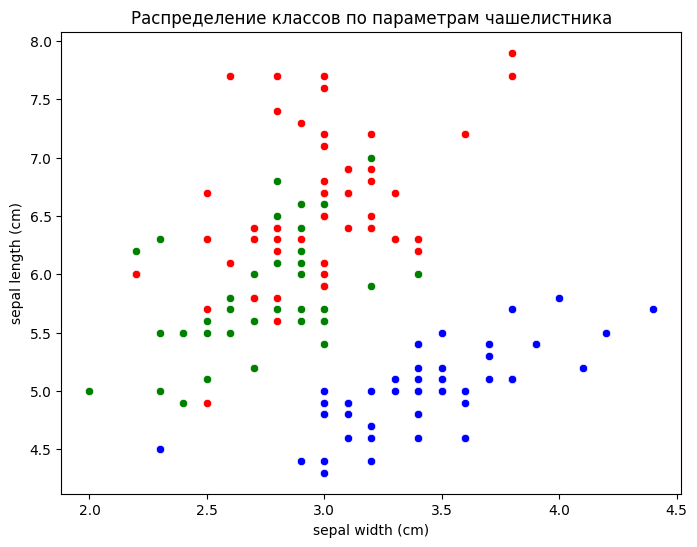

In [89]:
X['target'] = y

zero_cl = X[X['target'] == 0]
first_cl = X[X['target'] == 1]
second_cl = X[X['target'] == 2]

plt.figure(figsize = (8,6))

sns.scatterplot(x = zero_cl['sepal width (cm)'], y = zero_cl['sepal length (cm)'], facecolor = 'blue')
sns.scatterplot(x = first_cl['sepal width (cm)'], y = first_cl['sepal length (cm)'], facecolor = 'green')
sns.scatterplot(x = second_cl['sepal width (cm)'], y = second_cl['sepal length (cm)'], facecolor = 'red')

plt.title('Распределение классов по параметрам чашелистника')
plt.show()

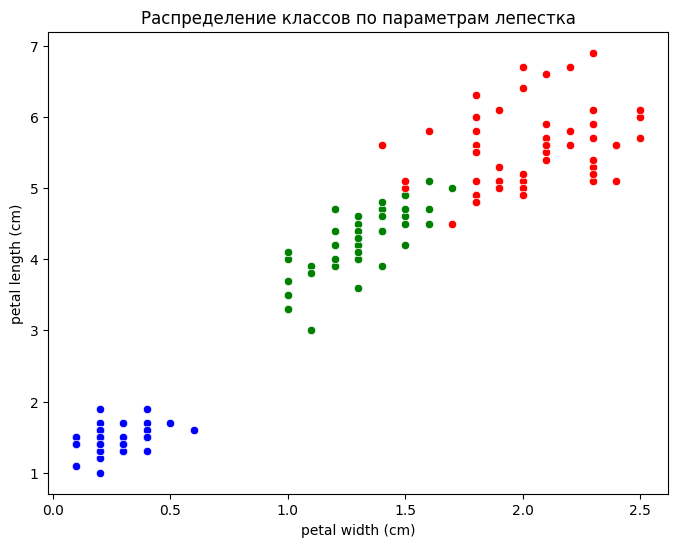

In [59]:
plt.figure(figsize = (8,6))

sns.scatterplot(x = zero_cl['petal width (cm)'], y = zero_cl['petal length (cm)'], facecolor = 'blue')
sns.scatterplot(x = first_cl['petal width (cm)'], y = first_cl['petal length (cm)'], facecolor = 'green')
sns.scatterplot(x = second_cl['petal width (cm)'], y = second_cl['petal length (cm)'], facecolor = 'red')

plt.title('Распределение классов по параметрам лепестка')
plt.show()

<Axes: >

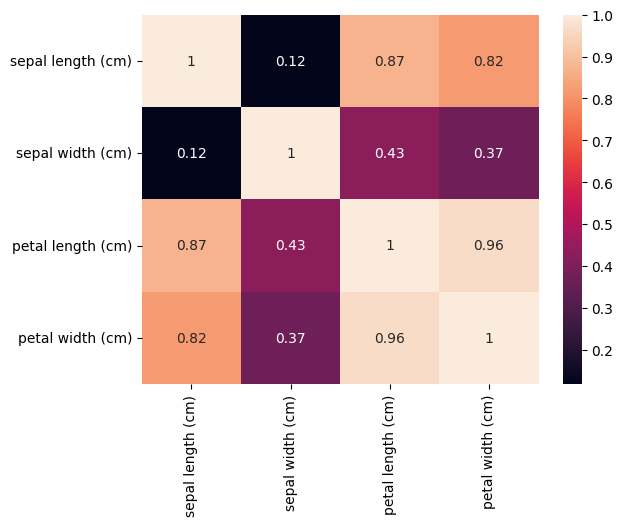

In [66]:
data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)',]].corr().abs()
sns.heatmap(data = data, annot = True )

In [90]:
X.drop('target', axis =1 )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

conf = confusion_matrix(y_test, y_pred)
print(conf)

rep = classification_report(y_test, y_pred)
print(rep)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Модель идеально точная, не знаю, в чём причина. Может быть, датасет был специально сделан таким, образом, чтобы закономерность была супер очевидной.